In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [2]:
business_df = pd.read_csv('imp_business_cleaned_data.csv')

In [3]:
business_df['postal_code'] = business_df['postal_code'].astype('object')

In [4]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 101 non-null    object 
 1   name                        101 non-null    object 
 2   city                        101 non-null    object 
 3   state                       101 non-null    object 
 4   postal_code                 101 non-null    object 
 5   stars                       101 non-null    float64
 6   review_count                101 non-null    int64  
 7   HasTV                       101 non-null    bool   
 8   OutdoorSeating              101 non-null    bool   
 9   RestaurantsTakeOut          101 non-null    bool   
 10  RestaurantsDelivery         101 non-null    bool   
 11  RestaurantsGoodForGroups    101 non-null    bool   
 12  Monday                      101 non-null    object 
 13  Tuesday                     101 non

Filtered businesses are situated in states `Pennsylvania` and `Florida` .

# Ideas
1. Draw the restaurants on a USA map using state, city, and pincode information.
   1. Map should be magnifiable.
   2. Add a filter for filtering restaurants by most popular attributes.
   3. Hover on a restaurant, show key metrics at a glance. 
      1. Average rating.
      2. Age of restaurant.
      3. Best/Worst attribute.
   4. On Click, show full restaurant average rating timeline.
2. More ...

> - There are total 44 cities. 101 restaurants.
> - Most number of restaurants are from 
>   - `Philadelphia: 27` 
>   - `Tampa: 19`
>   - `Pinellas Park: 4` 
>   - `Other cities<=2 restaurants.`

In [5]:
business_df['city'].value_counts(normalize=True)*100

Philadelphia          26.732673
Tampa                 18.811881
Pinellas Park          3.960396
Bensalem               1.980198
Clearwater             1.980198
St. Pete Beach         1.980198
Conshohocken           1.980198
St Petersburg          1.980198
New Hope               1.980198
Saint Petersburg       1.980198
Palm Harbor            1.980198
Largo                  1.980198
Bala Cynwyd            1.980198
Bryn Mawr              0.990099
Boothwyn               0.990099
Treasure Island        0.990099
Trinity                0.990099
Pottstown              0.990099
Port Richey            0.990099
Ruskin                 0.990099
Ambler                 0.990099
Glenside               0.990099
Spring House           0.990099
Apollo Beach           0.990099
Dunedin                0.990099
Folsom                 0.990099
Horsham                0.990099
Indian Rocks Beach     0.990099
Wayne                  0.990099
Springfield            0.990099
Pineville              0.990099
Wesley C

Distribution of `review count`

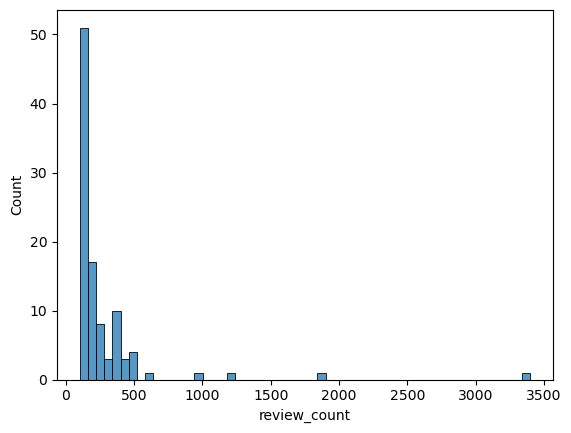

In [6]:
sns.histplot(business_df['review_count'])
plt.show()

As expected, the review count distribution is skewed with a right tail. 

Relationship between `Review Count` and `Star rating`
> Does a higher rated restaurant correlate with more reviews?

In [7]:
# correlation between 2 columns Pearson's value
correlation = np.round(business_df['review_count'].corr(business_df['stars']), 3)
print(f"Correlation: {correlation}")

Correlation: 0.017


> The `pearson score = 0.017` doesn't show any meaningful positive correlation between **review count** and **stars rating**.

In [8]:
spearman_corr,  p_value = stats.spearmanr(business_df['stars'], business_df['review_count'])
print(f"Spearman's Rank Correlation: {np.round(spearman_corr, 3)}")
place_holder = 'insignificant'
alpha = 0.1
if p_value <= alpha:
  place_holder = 'significant'

correlation_significance = f'The correlation is statistically {place_holder}'
print(correlation_significance)


Spearman's Rank Correlation: 0.172
The correlation is statistically significant


- Spearman's rank Correlation score indicates that score of 0.17 is statistically significant at a significance level of 0.1. 
> - In simple terms, increase in number of reviews of a restaurant, correlate to higher star rating.
> - Increase in number of reviews, means that there are more people visiting the restaurant.
> - Which means that the business is doing something right that is drawing more people to it. 
> - That means that, *increasing the review count is a good metric to aim at.*

Boolean type columns are also of categorical nature.

In [9]:
cat_col = set()
for col in business_df.columns:
  if business_df[col].dtype == 'object':
    cat_col.add(col)

In [10]:
bool_col = set()
for col in business_df.columns:
  if business_df[col].dtype == 'bool':
    bool_col.add(col)

Target variable: `Stars`

> Which of the Dichotomous/Binary Features have a **statistically significant correlation** to `Stars` rating of a restaurant.

Point-Biserial Correlation is a statistical test used when testing the strength and direction of correlation between a Binary Variable and a Target Variable (Star rating).
> 1. The Target variable should be either numerical or Ordinal.
> 1. It is a variation the Pearson Score. 
> 1. The results are in the range of -1 to 1. 
> 1. -1 is perfect Negative Correlation and 1 is perfect Positive Correlation, 0 is no correlation.


In [11]:
from scipy import stats

for col in bool_col:
  point_biserial_corr, p_value = stats.pointbiserialr(business_df[col], business_df['stars'])
  if p_value < 0.1:
    print(f"Point-Biserial Correlation for {col}: {np.round(point_biserial_corr, 3)}")
    print(f"P-value: {p_value}")
    print('The correlation is statistically significant')
    print('')
  # else: 
    # print('The correlation is statistically insignificant')

Point-Biserial Correlation for RestaurantsGoodForGroups: -0.234
P-value: 0.018446875513614142
The correlation is statistically significant

Point-Biserial Correlation for Caters: 0.192
P-value: 0.05463287243914246
The correlation is statistically significant

Point-Biserial Correlation for HasTV: -0.419
P-value: 1.2881016957872429e-05
The correlation is statistically significant



Point Biserial test reveals 3 binary features that are significantly correlated with `star rating`.
1. RestaurantGoodForGroups - Negative Correlation
2. Caters - Positive Correlation
3. HasTV - Negative Correlation

Other features are **not statistically significantly correlated** to `star rating`.

> These business attributes can be tailored to improve the overall customer service and consequently the restaurant rating. 

In [13]:
business_df[['Monday_opening_hour', 'Monday_closing_hour']] = business_df['Monday'].str.split("-", expand=True)
business_df[['Tuesday_opening_hour', 'Tuesday_closing_hour']] = business_df['Tuesday'].str.split("-", expand=True)
business_df[['Wednesday_opening_hour', 'Wednesday_closing_hour']] = business_df['Wednesday'].str.split("-", expand=True)
business_df[['Thursday_opening_hour', 'Thursday_closing_hour']] = business_df['Thursday'].str.split("-", expand=True)
business_df[['Friday_opening_hour', 'Friday_closing_hour']] = business_df['Friday'].str.split("-", expand=True)
business_df[['Saturday_opening_hour', 'Saturday_closing_hour']] = business_df['Saturday'].str.split("-", expand=True)
business_df[['Sunday_opening_hour', 'Sunday_closing_hour']] = business_df['Sunday'].str.split("-", expand=True)

In [15]:
# Step 2: Convert to 24-hour time format
def convert_to_24_hour(time_str):
    hour, minute = map(int, time_str.split(':'))
    return f"{hour:02d}:{minute:02d}"

In [17]:
# All opening hours of the week
business_df['Monday_opening_hour'] = business_df['Monday_opening_hour'].str.split(':').str.get(0)
business_df['Monday_opening_hour'] = pd.to_numeric(business_df['Monday_opening_hour'])

business_df['Tuesday_opening_hour'] = business_df['Tuesday_opening_hour'].str.split(':').str.get(0)
business_df['Tuesday_opening_hour'] = pd.to_numeric(business_df['Tuesday_opening_hour'])

business_df['Wednesday_opening_hour'] = business_df['Wednesday_opening_hour'].str.split(':').str.get(0)
business_df['Wednesday_opening_hour'] = pd.to_numeric(business_df['Wednesday_opening_hour'])

business_df['Thursday_opening_hour'] = business_df['Thursday_opening_hour'].str.split(':').str.get(0)
business_df['Thursday_opening_hour'] = pd.to_numeric(business_df['Thursday_opening_hour'])

business_df['Friday_opening_hour'] = business_df['Friday_opening_hour'].str.split(':').str.get(0)
business_df['Friday_opening_hour'] = pd.to_numeric(business_df['Friday_opening_hour'])

business_df['Saturday_opening_hour'] = business_df['Saturday_opening_hour'].str.split(':').str.get(0)
business_df['Saturday_opening_hour'] = pd.to_numeric(business_df['Saturday_opening_hour'])

business_df['Sunday_opening_hour'] = business_df['Sunday_opening_hour'].str.split(':').str.get(0)
business_df['Sunday_opening_hour'] = pd.to_numeric(business_df['Sunday_opening_hour'])


In [18]:
# All closing hours in a week
business_df['Monday_closing_hour'] = business_df['Monday_closing_hour'].str.split(':').str.get(0)
business_df['Monday_closing_hour'] = pd.to_numeric(business_df['Monday_closing_hour'])

business_df['Tuesday_closing_hour'] = business_df['Tuesday_closing_hour'].str.split(':').str.get(0)
business_df['Tuesday_closing_hour'] = pd.to_numeric(business_df['Tuesday_closing_hour'])

business_df['Wednesday_closing_hour'] = business_df['Wednesday_closing_hour'].str.split(':').str.get(0)
business_df['Wednesday_closing_hour'] = pd.to_numeric(business_df['Wednesday_closing_hour'])

business_df['Thursday_closing_hour'] = business_df['Thursday_closing_hour'].str.split(':').str.get(0)
business_df['Thursday_closing_hour'] = pd.to_numeric(business_df['Thursday_closing_hour'])

business_df['Friday_closing_hour'] = business_df['Friday_closing_hour'].str.split(':').str.get(0)
business_df['Friday_closing_hour'] = pd.to_numeric(business_df['Friday_closing_hour'])

business_df['Saturday_closing_hour'] = business_df['Saturday_closing_hour'].str.split(':').str.get(0)
business_df['Saturday_closing_hour'] = pd.to_numeric(business_df['Saturday_closing_hour'])

business_df['Sunday_closing_hour'] = business_df['Sunday_closing_hour'].str.split(':').str.get(0)
business_df['Sunday_closing_hour'] = pd.to_numeric(business_df['Sunday_closing_hour'])




In [20]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 101 non-null    object 
 1   name                        101 non-null    object 
 2   city                        101 non-null    object 
 3   state                       101 non-null    object 
 4   postal_code                 101 non-null    object 
 5   stars                       101 non-null    float64
 6   review_count                101 non-null    int64  
 7   HasTV                       101 non-null    bool   
 8   OutdoorSeating              101 non-null    bool   
 9   RestaurantsTakeOut          101 non-null    bool   
 10  RestaurantsDelivery         101 non-null    bool   
 11  RestaurantsGoodForGroups    101 non-null    bool   
 12  Monday                      101 non-null    object 
 13  Tuesday                     101 non